#Titanic Analysis
####Created by Mowleen Armstrong

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
# Upload files directly
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload train.csv and test.csv

Saving test.csv to test (4).csv
Saving train.csv to train (4).csv


In [27]:
# For direct upload
train_data = pd.read_csv('train.csv')  # Use this for direct upload
test_data = pd.read_csv('test.csv')    # Use this for direct upload

# For Google Drive
# train_data = pd.read_csv('/content/drive/My Drive/Titanic/train.csv')  # Use this for Google Drive
# test_data = pd.read_csv('/content/drive/My Drive/Titanic/test.csv')    # Use this for Google Drive

In [28]:
# Data Preprocessing
# Fill missing values for Age with median and Fare with mean
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

# Convert 'Sex' to numerical values
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

# Convert 'Embarked' to numerical values
train_data['Embarked'].fillna('S', inplace=True)  # Fill missing values with the most common port
test_data['Embarked'].fillna('S', inplace=True)   # Fill missing values with the most common port
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])
test_data['Embarked'] = label_encoder.transform(test_data['Embarked'])

# Create a new feature for family size
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']

# Drop unnecessary columns
train_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

<ipython-input-28-baeeb8e93948>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-28-baeeb8e93948>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

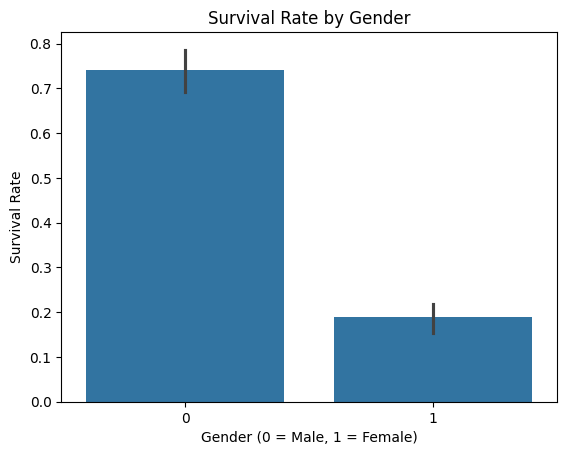

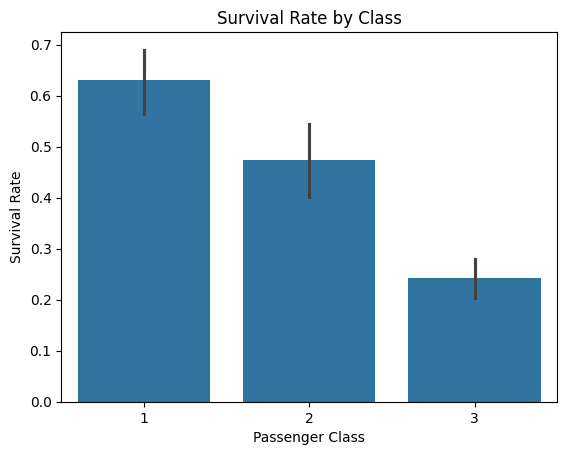

In [29]:
# Exploratory Data Analysis
# Visualize survival rate by gender
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.show()

# Visualize survival rate by class
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [30]:
# Prepare data for modeling
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Predictions
y_pred = model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[89 16]
 [18 56]]


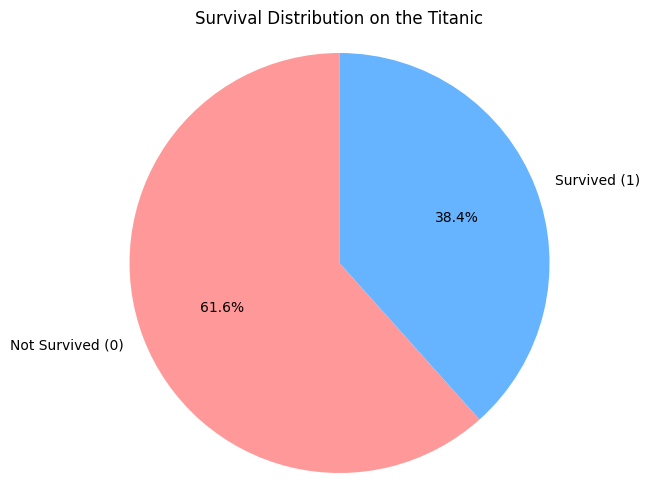

In [36]:
# Create a pie chart for survival analysis
survival_counts = train_data['Survived'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(survival_counts, labels=['Not Survived (0)', 'Survived (1)'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Survival Distribution on the Titanic')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

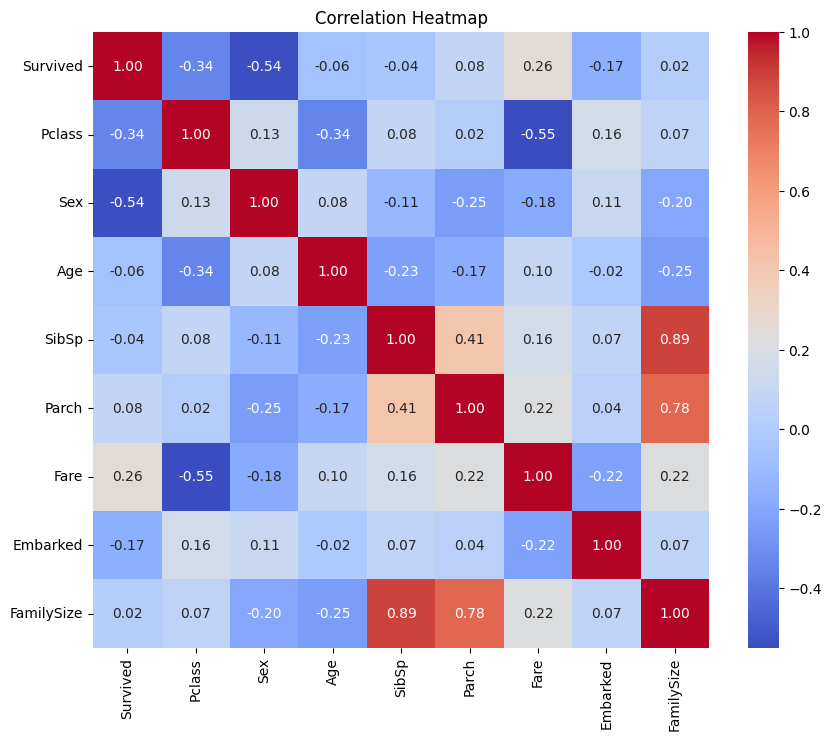

In [37]:
# Create a heatmap for correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

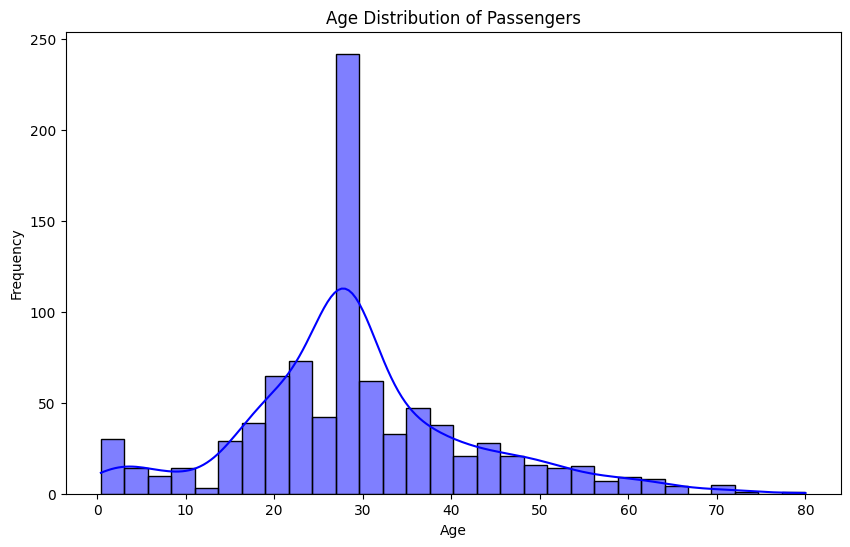

In [38]:
# Create a histogram for age distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-39-ab0ef4ebda4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=train_data, palette='viridis')


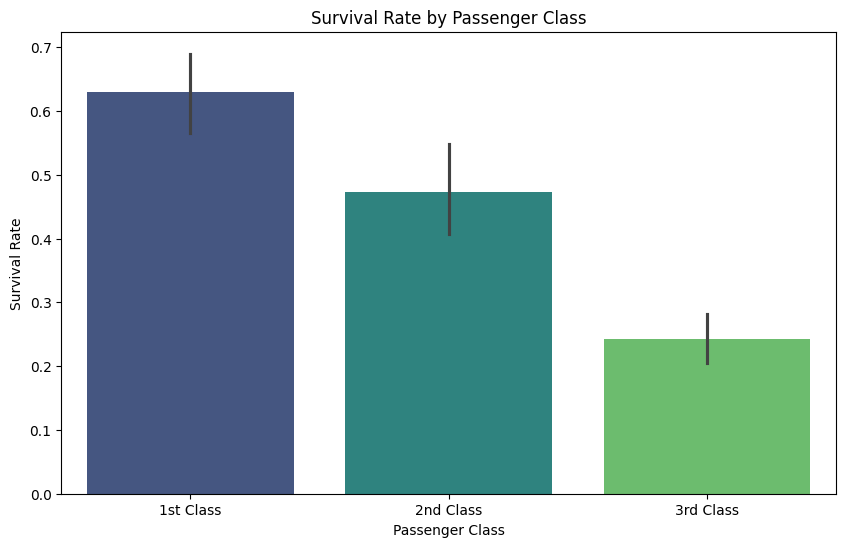

In [39]:
# Create a bar chart for survival rate by class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()